In [12]:
import numpy as np
import pandas as pd
import time
import matplotlib
matplotlib.rcParams['font.family'] = 'STSong'
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('data/rumor_text_data_final.csv')
df.head(2)

,date,source,content,core,province,like,views,all_topic,all_prob,all_emotion,...,sub_prob,sub_emotion,day,week,half_month,month,period,covid,abs_all_emotion,abs_sub_emotion
0,2022-02-18,北京日报客户端,“有人从香港游泳偷渡到深圳湾被捕？”假的！系轻生被救！,有人从香港游泳偷渡到深圳湾被捕？,广东省,0,0,4,0.923976,0.974462,...,0.869034,0.891570,18,2022-02-15,2022-02-15,2022-02-01,2022-01-15,疫情中期,0.474462,0.391570
1,2022-02-18,大河报、羊城晚报,近日，社交媒体上一则题为“河南一位老爷爷考上清华大学被顶替”的消息引发网友关注和转发。消息称...,河南一位老爷爷考上清华大学被顶替,河南省,41,1,3,0.987694,1.000000,...,0.847208,0.812769,18,2022-02-15,2022-02-15,2022-02-01,2022-01-15,疫情中期,0.500000,0.312769


In [14]:
df_source = pd.read_csv('data/rumor_source_data.csv')
df_source.head(3)

,1018陕广新闻,万山公安,三亚日报,三联生活周刊,上林县公安局,上海发布,上海市卫健委,上海网络辟谣,上海网络辟谣,上观新闻,...,陕西渭南临渭公安,雁塔宣传（中共西安市雁塔区委外宣办官方账号）,青岛市卫生健康委员会,靖边县公安局,魅力碑林（西安市碑林区官方账号）,鹰潭网警巡查执法,麻城市公安局,黄冈网警巡查执法,黑龙江交通广播,黑龙江网络广播电视台都市频道
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6 总结与补充

## 6.1 谣言点赞量与辟谣来源数量的关系

对点赞量做对数变换。

In [15]:
df['log_like'] = np.log1p(df['like'])

用对数变换后的数据画出箱线图，发现辟谣来源数量与点赞数量是正相关的。

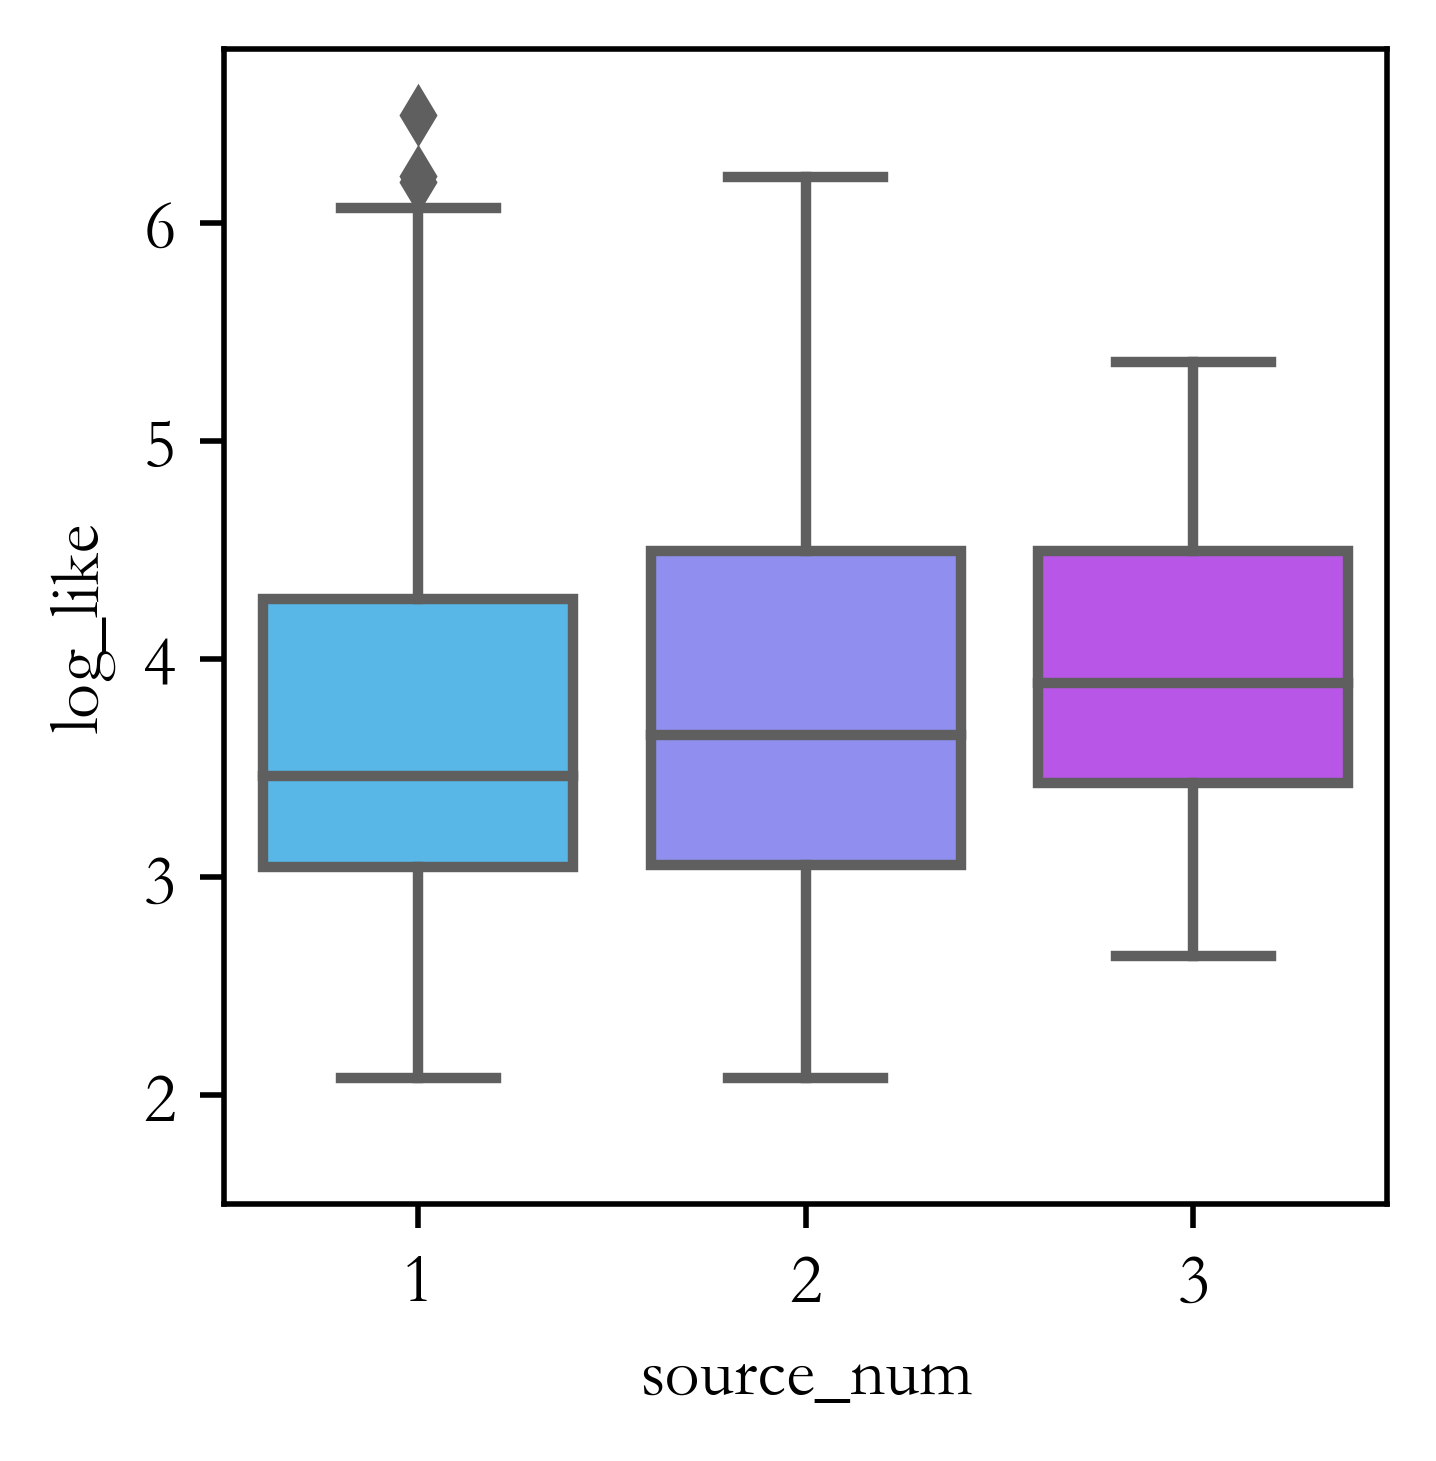

In [21]:
df['source_num'] = df_source.sum(1)
plt.figure(figsize = (3, 3), dpi=500)
sns.boxplot(x=df.source_num, y=df.log_like, palette='cool')
plt.ylim(1.5, 6.8)
plt.show()

## 6.2 谣言与疫情时期的关系

不同时期下的谣言热度。

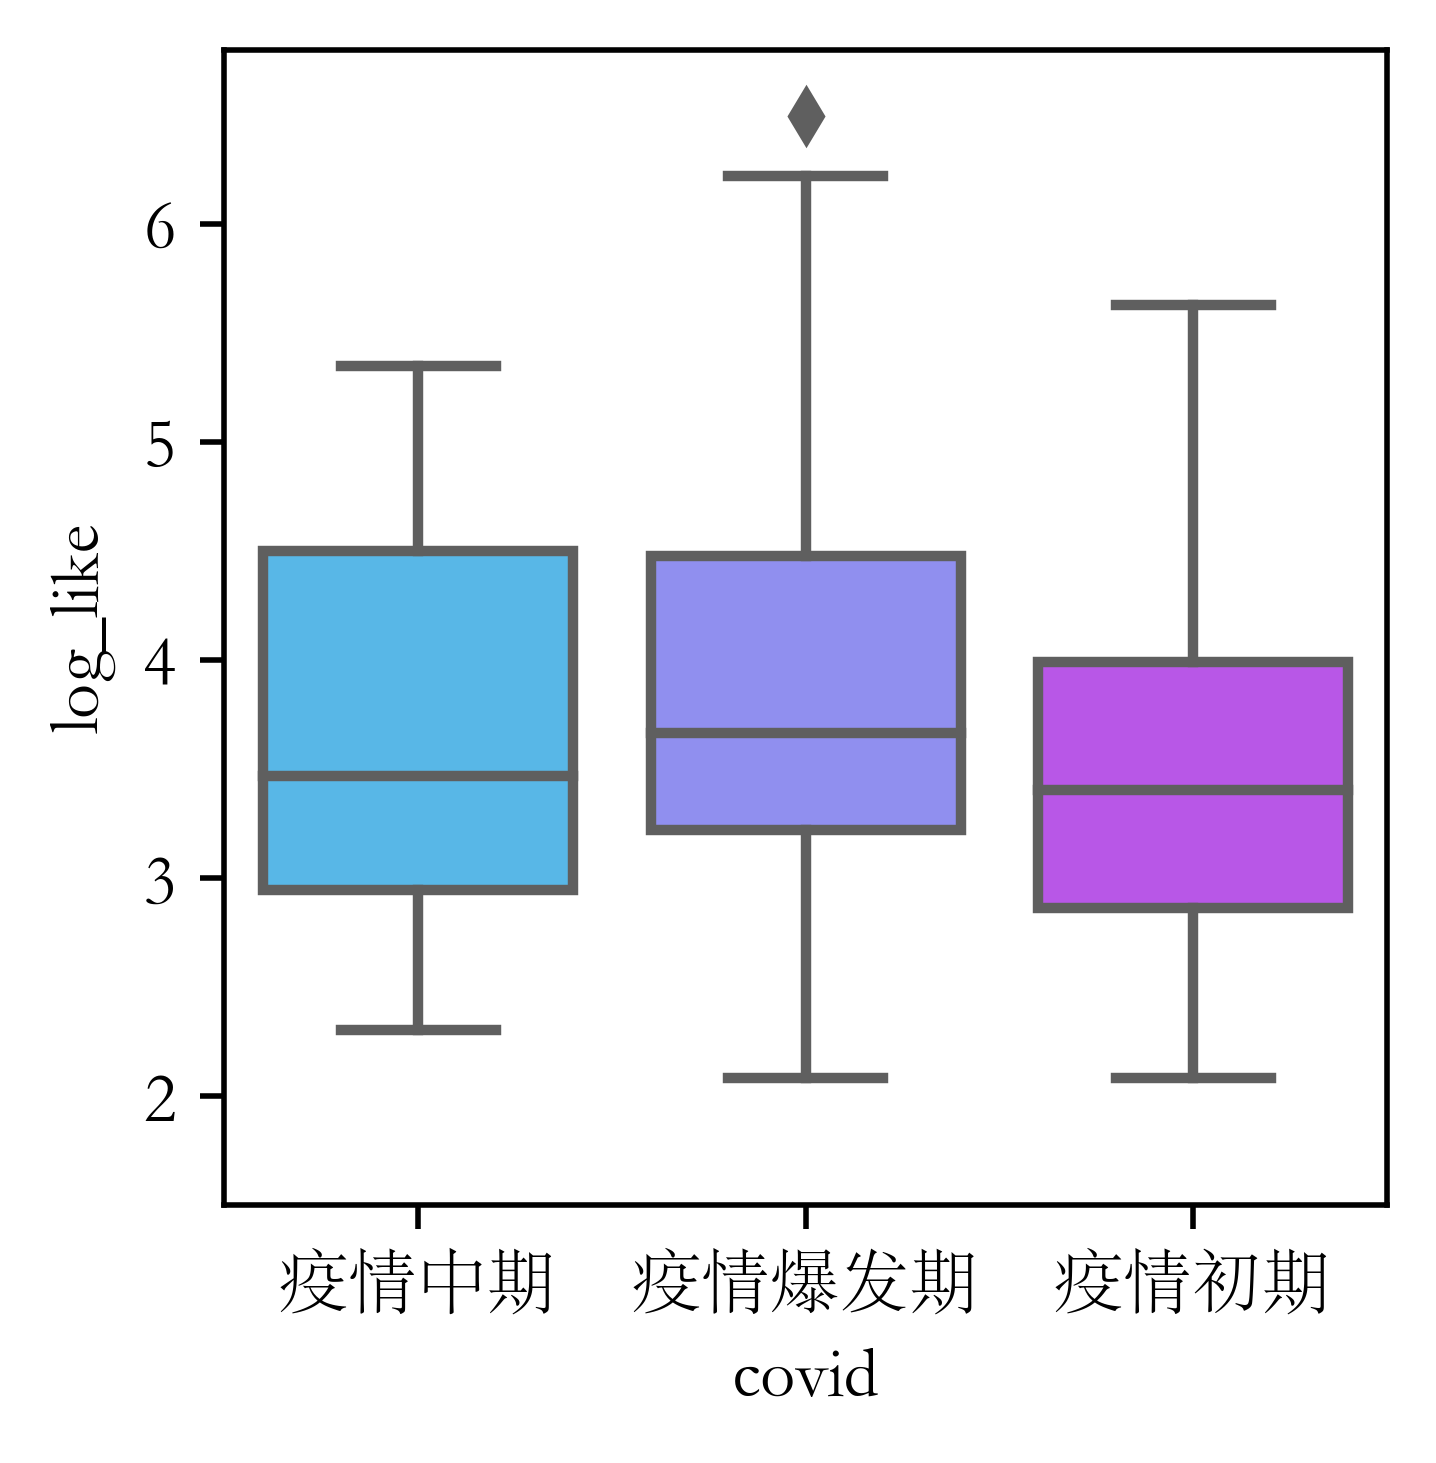

In [19]:
plt.figure(figsize = (3, 3), dpi=500)
sns.boxplot(x=df.covid, y=df.log_like, palette='cool')
plt.ylim(1.5, 6.8)
plt.show()

不同时期下的情感强度。

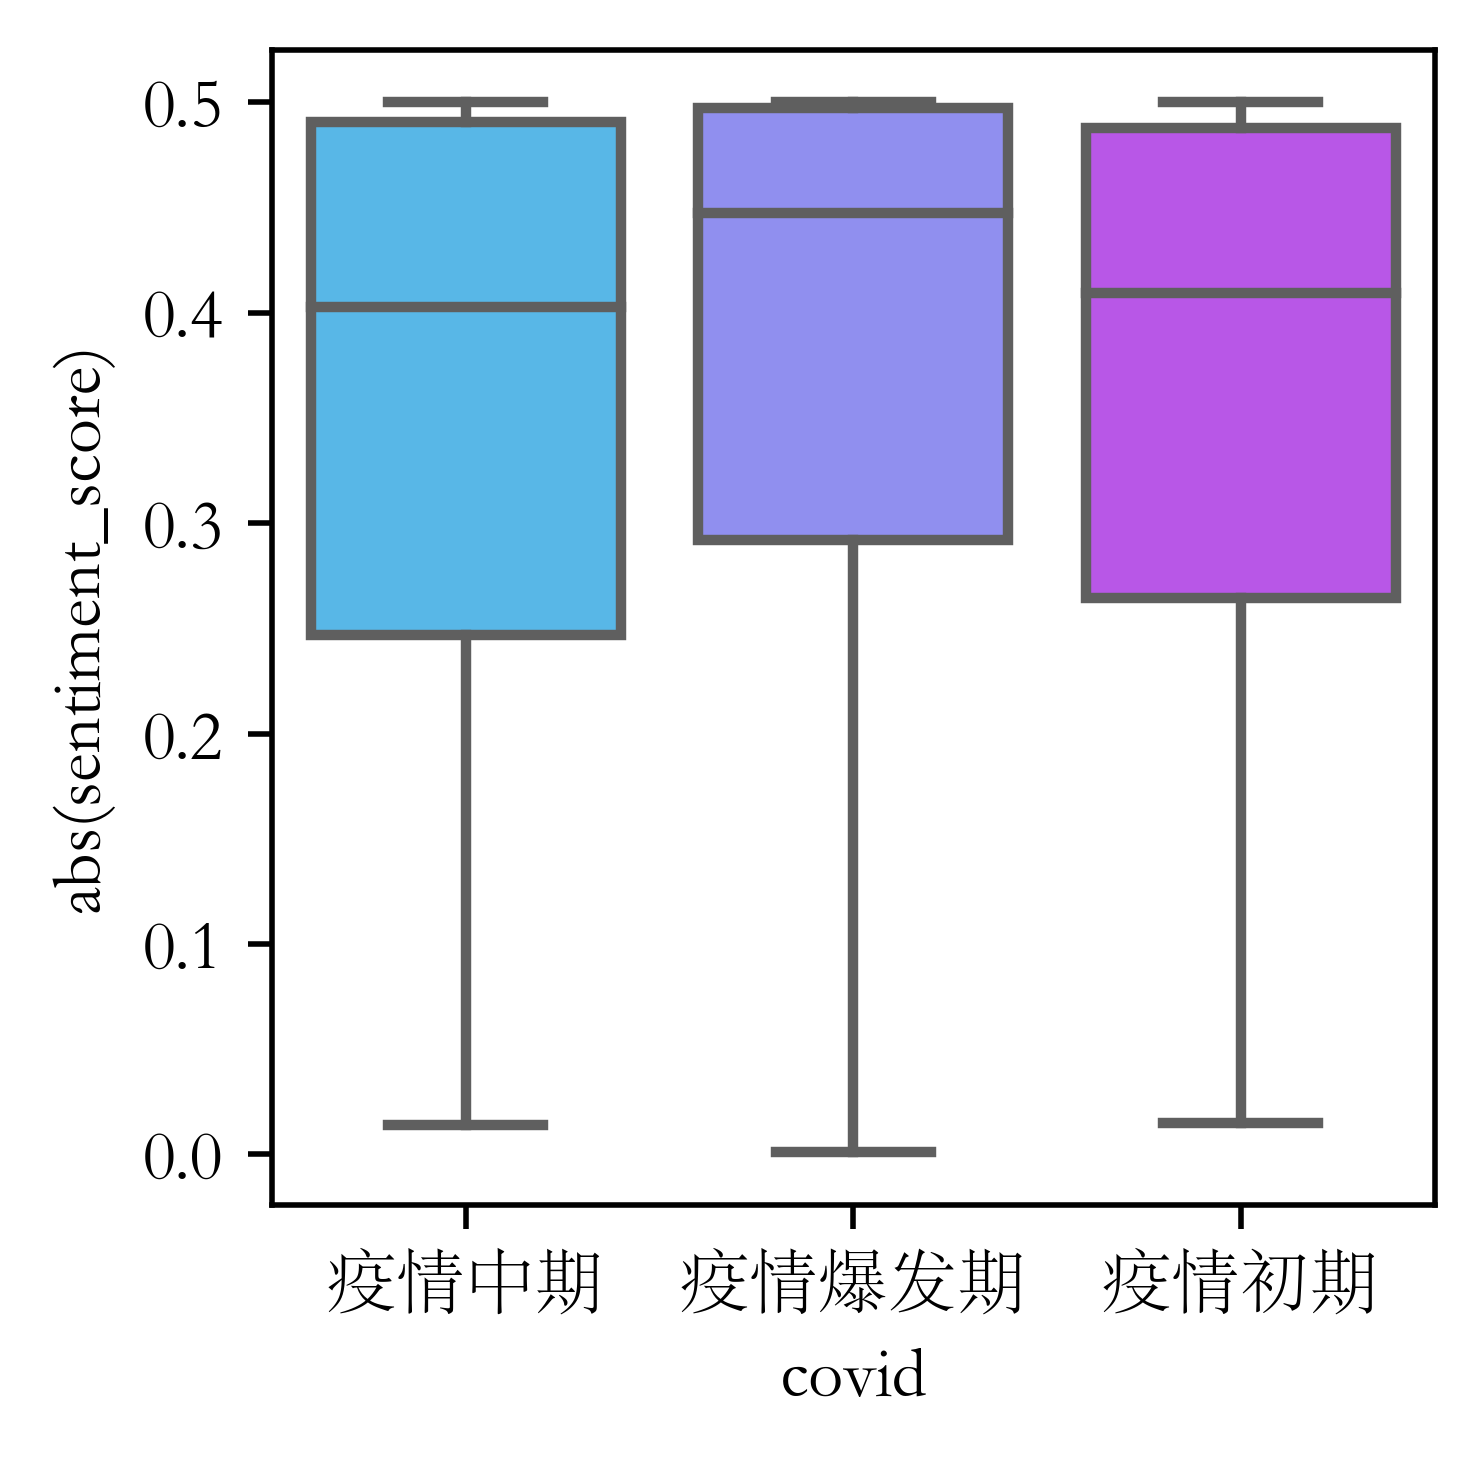

In [20]:
plt.figure(figsize = (3, 3), dpi=500)
sns.boxplot(x=df.covid, y=df.abs_sub_emotion, palette='cool')
plt.ylabel('abs(sentiment_score)')
plt.show()